In [89]:
from tensorflow.keras.models import load_model
from keras.metrics import Precision, Recall
import keras
from keras import metrics
import keras_metrics

In [88]:
!pip install keras_metrics

In [98]:
model_path = './model/CNN_8COIN3Ccomb2_USD.h5'

# precision = keras.metrics.Precision
# precision.__name__ = 'precision'
# recall = keras.metrics.Recall
# recall.__name__ = 'recall'
# # b = keras.metrics.Recall
model = load_model(model_path, custom_objects={"precision":keras_metrics.precision(), "recall":keras_metrics.recall()})


tracking <tf.Variable 'Variable_16:0' shape=() dtype=int32> tp
tracking <tf.Variable 'Variable_17:0' shape=() dtype=int32> fp
tracking <tf.Variable 'Variable_18:0' shape=() dtype=int32> tp
tracking <tf.Variable 'Variable_19:0' shape=() dtype=int32> fn


TypeError: can only concatenate str (not "precision") to str

In [60]:
a.name

'precision'

In [77]:
a = keras.metrics.Precision(name='precision')
a.name

'precision'

In [79]:
from tensorflow.python.saved_model import loader_impl
from tensorflow.python.keras.saving.saved_model import load as saved_model_load

model_path = './model/CNN_8COIN3Ccomb2_USD.h5'
precision = keras.metrics.Precision
precision.__name__ = 'precision'
recall = keras.metrics.Recall
recall.__name__ = 'recall'
# # b = keras.metrics.Recall
# model = load_model(model_path, custom_objects={"Precision":precision, "Recall":recall})

loader_impl.parse_saved_model(model_path)
model = saved_model_load.load(model_path, custom_objects={"Precision":precision, "Recall":recall})

ImportError: cannot import name 'load' from 'tensorflow.python.keras.saving.saved_model' (/Users/haoyuzhang/anaconda3/envs/Kerasenv/lib/python3.7/site-packages/tensorflow/python/keras/saving/saved_model.py)

In [99]:
model_path = './model/CNN_8COIN3Ccomb2_USD.h5'
with CustomObjectScope({'precision': keras_metrics.precision(), 'recall':keras_metrics.recall()}):
    model = load_model(model_path)
    

tracking <tf.Variable 'Variable_20:0' shape=() dtype=int32> tp
tracking <tf.Variable 'Variable_21:0' shape=() dtype=int32> fp
tracking <tf.Variable 'Variable_22:0' shape=() dtype=int32> tp
tracking <tf.Variable 'Variable_23:0' shape=() dtype=int32> fn


In [100]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 10, 10, 32)        1184      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 5, 32)          4128      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2, 2, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)              

In [97]:
type(model)

tensorflow.python.keras.engine.sequential.Sequential

In [124]:
from datetime import datetime, timedelta
import pandas as pd

In [126]:
start_date = '2022-3-1'
end_date = '2022-2-20'

ed = int(datetime.strptime(end_date, '%Y-%m-%d').timestamp())
sd = int(datetime.strptime(start_date, '%Y-%m-%d').timestamp())

In [112]:
sd -  timedelta(days=7)

TypeError: unsupported operand type(s) for -: 'int' and 'datetime.timedelta'

In [107]:
sd - datetime.

1646114400

In [135]:
ed = datetime.now()

In [138]:
int(ed.timestamp())

1647067710

In [120]:
sd = ed - timedelta(days=7) 

In [130]:
ed 

datetime.datetime(2022, 3, 11, 23, 57, 31, 510337)

In [122]:
sd

datetime.datetime(2022, 3, 4, 22, 58, 20, 646457)

In [134]:
ed

datetime.datetime(2022, 3, 12, 0, 44, 51, 386749)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')

In [3]:
df = pd.read_csv('./temp/DOT_USD_history.csv')
df.head()

,time,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol,comments,...,reddit_comments_per_hour,reddit_comments_per_day,code_repo_stars,code_repo_forks,code_repo_subscribers,code_repo_open_pull_issues,code_repo_closed_pull_issues,code_repo_open_issues,code_repo_closed_issues,code_repo_contributors
0,2022-03-08 20:00:00,17.16,16.89,17.12,73181.38,1244442.09,16.98,direct,NaN,513560,...,262.97,6311.18,56870,29844,3845,401,15501,614,5826,1003
1,2022-03-08 21:00:00,16.98,16.78,16.98,47205.39,796512.71,16.81,direct,NaN,513577,...,173.33,4159.85,56870,29844,3845,401,15501,614,5826,1003
2,2022-03-08 22:00:00,16.92,16.80,16.81,28891.81,487316.63,16.84,direct,NaN,513611,...,150.56,3613.55,56870,29844,3845,401,15501,614,5826,1003
3,2022-03-08 23:00:00,16.99,16.81,16.84,30722.32,519363.05,16.99,direct,NaN,513632,...,143.88,3453.24,56870,29844,3845,401,15501,614,5826,1003
4,2022-03-09 00:00:00,17.10,16.89,16.99,48516.17,825902.63,17.08,direct,NaN,513633,...,181.09,4346.08,56870,29844,3845,401,15501,614,5826,1003


In [5]:
df.columns

Index(['time', 'high', 'low', 'open', 'volumefrom', 'volumeto', 'close',
       'conversionType', 'conversionSymbol', 'comments', 'posts', 'followers',
       'points', 'overview_page_views', 'analysis_page_views',
       'markets_page_views', 'charts_page_views', 'trades_page_views',
       'forum_page_views', 'influence_page_views', 'total_page_views',
       'fb_likes', 'fb_talking_about', 'twitter_followers',
       'twitter_following', 'twitter_lists', 'twitter_favourites',
       'twitter_statuses', 'reddit_subscribers', 'reddit_active_users',
       'reddit_posts_per_hour', 'reddit_posts_per_day',
       'reddit_comments_per_hour', 'reddit_comments_per_day',
       'code_repo_stars', 'code_repo_forks', 'code_repo_subscribers',
       'code_repo_open_pull_issues', 'code_repo_closed_pull_issues',
       'code_repo_open_issues', 'code_repo_closed_issues',
       'code_repo_contributors'],
      dtype='object')

In [29]:
predict = np.random.randint(2, size =160)
predict = np.append(b, predict)

In [24]:
b = np.empty(9)
b[:] = np.nan

In [30]:
predict 

array([nan, nan, nan, nan, nan, nan, nan, nan, nan,  1.,  0.,  0.,  0.,
        1.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,
        1.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,
        1.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,
        0.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,
        1.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,
        0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,
        0.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,
        1.,  1.,  1.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,
        1.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,
        1.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,
        1.,  1.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
        1.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  0.])

In [16]:
df['predict'] = ''

In [32]:
df['predict'] = predict

In [33]:
df['predict']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
164    0.0
165    1.0
166    0.0
167    0.0
168    0.0
Name: predict, Length: 169, dtype: float64

In [39]:
df = pd.read_csv('./temp/DOT_USD_result.csv')

In [41]:
df.set_index('time')

,open,high,close,low,volumeto,reddit_active_users,reddit_posts_per_hour,posts,total_page_views,predict
time,,,,,,,,,,
2022-03-09 00:00:00,16.99,17.10,17.08,16.89,825902.63,2543,4.10,150898,64013693,NaN
2022-03-09 01:00:00,17.08,17.44,17.42,17.06,1506578.54,2543,4.04,150899,64013988,NaN
2022-03-09 02:00:00,17.42,17.46,17.32,17.27,1231220.83,2543,3.87,150903,64014246,NaN
2022-03-09 03:00:00,17.32,17.80,17.71,17.28,2678400.81,2543,3.75,150905,64014557,NaN
2022-03-09 04:00:00,17.71,17.83,17.77,17.70,1967759.82,2543,3.84,150907,64015059,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-03-15 20:00:00,17.95,18.02,17.85,17.83,1065180.74,2543,3.79,151104,64087777,1.0
2022-03-15 21:00:00,17.85,17.93,17.93,17.76,1045832.00,2543,3.76,151105,64088317,2.0
2022-03-15 22:00:00,17.93,18.04,17.86,17.84,708537.67,2543,3.69,151107,64088808,2.0


<AxesSubplot:>

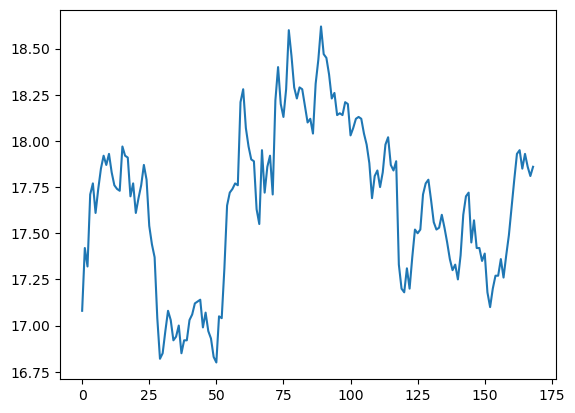

In [46]:
df['close'].plot()

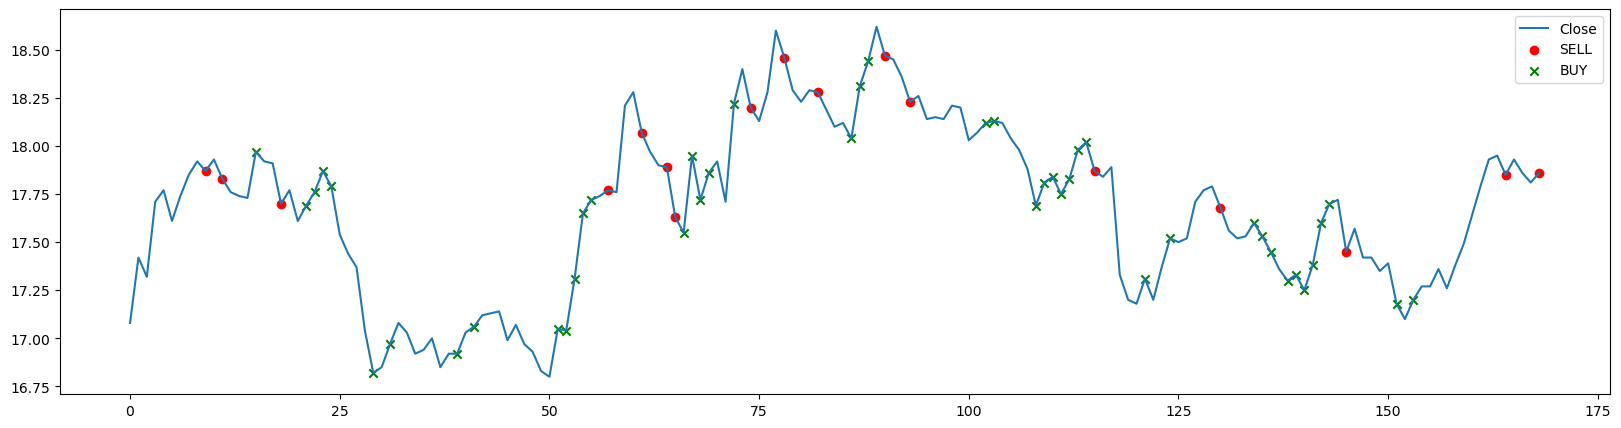

In [68]:
plt.figure(figsize=(20,5))
plt.plot(df.close, label='Close')
plt.scatter(df[df['predict']==1].index, df[df['predict']==1].close, label = "SELL", c='red')
plt.scatter(df[df['predict']==0].index, df[df['predict']==0].close, label = "BUY", c='green', marker='x')

plt.legend()
plt.show()

In [63]:
df[df['predict']==1].close

9      17.87
11     17.83
18     17.70
57     17.77
61     18.07
64     17.89
65     17.63
74     18.20
78     18.46
82     18.28
90     18.47
93     18.23
115    17.87
130    17.68
145    17.45
164    17.85
168    17.86
Name: close, dtype: float64

In [69]:
df

,time,open,high,close,low,volumeto,reddit_active_users,reddit_posts_per_hour,posts,total_page_views,predict
0,2022-03-09 00:00:00,16.99,17.10,17.08,16.89,825902.63,2543,4.10,150898,64013693,NaN
1,2022-03-09 01:00:00,17.08,17.44,17.42,17.06,1506578.54,2543,4.04,150899,64013988,NaN
2,2022-03-09 02:00:00,17.42,17.46,17.32,17.27,1231220.83,2543,3.87,150903,64014246,NaN
3,2022-03-09 03:00:00,17.32,17.80,17.71,17.28,2678400.81,2543,3.75,150905,64014557,NaN
4,2022-03-09 04:00:00,17.71,17.83,17.77,17.70,1967759.82,2543,3.84,150907,64015059,NaN
...,...,...,...,...,...,...,...,...,...,...,...
164,2022-03-15 20:00:00,17.95,18.02,17.85,17.83,1065180.74,2543,3.79,151104,64087777,1.0
165,2022-03-15 21:00:00,17.85,17.93,17.93,17.76,1045832.00,2543,3.76,151105,64088317,2.0
166,2022-03-15 22:00:00,17.93,18.04,17.86,17.84,708537.67,2543,3.69,151107,64088808,2.0
167,2022-03-15 23:00:00,17.86,17.91,17.81,17.79,460877.43,2543,3.69,151076,64089252,2.0


In [7]:
df = pd.read_csv('./temp/ETH_USD_result.csv')
df.tail(10)

,time,open,high,close,low,volumeto,reddit_active_users,reddit_posts_per_hour,posts,total_page_views,predict,extra_predict
159,2022-03-15 20:00:00,2658.43,2668.80,2626.19,2624.04,5.693220e+07,2543,3.79,151104,64087777,1.0,2.0
160,2022-03-15 21:00:00,2626.19,2634.71,2633.84,2610.87,3.570598e+07,2543,3.76,151105,64088317,1.0,1.0
161,2022-03-15 22:00:00,2633.84,2642.74,2624.75,2621.30,1.724082e+07,2543,3.69,151107,64088808,2.0,2.0
162,2022-03-15 23:00:00,2624.75,2631.44,2619.61,2618.16,1.722352e+07,2543,3.69,151076,64089252,2.0,2.0
163,2022-03-16 00:00:00,2619.61,2628.60,2612.28,2607.23,2.079952e+07,2543,3.70,151076,64089606,2.0,1.0
164,2022-03-16 01:00:00,2612.28,2648.27,2645.39,2610.03,2.457300e+07,2543,3.70,151076,64089880,2.0,2.0
165,2022-03-16 02:00:00,2645.39,2710.03,2691.65,2642.77,1.113743e+08,2543,3.73,151076,64090139,0.0,0.0
166,2022-03-16 03:00:00,2691.65,2692.90,2622.97,2615.72,8.711213e+07,2543,4.39,151077,64090693,1.0,1.0
167,2022-03-16 04:00:00,2623.11,2628.95,2621.12,2618.38,1.698795e+07,2543,4.49,151078,64091157,2.0,2.0
168,2022-03-16 05:00:00,2620.67,2631.18,2627.57,2615.73,3.195878e+07,2543,4.30,151078,64091522,2.0,2.0


In [8]:
df['predict1'] = df['predict']

In [9]:
df.tail(10)

,time,open,high,close,low,volumeto,reddit_active_users,reddit_posts_per_hour,posts,total_page_views,predict,extra_predict,predict1
159,2022-03-15 20:00:00,2658.43,2668.80,2626.19,2624.04,5.693220e+07,2543,3.79,151104,64087777,1.0,2.0,1.0
160,2022-03-15 21:00:00,2626.19,2634.71,2633.84,2610.87,3.570598e+07,2543,3.76,151105,64088317,1.0,1.0,1.0
161,2022-03-15 22:00:00,2633.84,2642.74,2624.75,2621.30,1.724082e+07,2543,3.69,151107,64088808,2.0,2.0,2.0
162,2022-03-15 23:00:00,2624.75,2631.44,2619.61,2618.16,1.722352e+07,2543,3.69,151076,64089252,2.0,2.0,2.0
163,2022-03-16 00:00:00,2619.61,2628.60,2612.28,2607.23,2.079952e+07,2543,3.70,151076,64089606,2.0,1.0,2.0
164,2022-03-16 01:00:00,2612.28,2648.27,2645.39,2610.03,2.457300e+07,2543,3.70,151076,64089880,2.0,2.0,2.0
165,2022-03-16 02:00:00,2645.39,2710.03,2691.65,2642.77,1.113743e+08,2543,3.73,151076,64090139,0.0,0.0,0.0
166,2022-03-16 03:00:00,2691.65,2692.90,2622.97,2615.72,8.711213e+07,2543,4.39,151077,64090693,1.0,1.0,1.0
167,2022-03-16 04:00:00,2623.11,2628.95,2621.12,2618.38,1.698795e+07,2543,4.49,151078,64091157,2.0,2.0,2.0
168,2022-03-16 05:00:00,2620.67,2631.18,2627.57,2615.73,3.195878e+07,2543,4.30,151078,64091522,2.0,2.0,2.0


In [20]:
def filter_predict(p,pe):
    
    if p == 0 and pe == 0:
        return 0
    elif p == 1 and pe == 1:
        return 1
    else:
        return 2

df['predict'] = df.apply(lambda x: filter_predict(x.predict, x.extra_predict), axis=1)

In [21]:
df

,time,open,high,close,low,volumeto,reddit_active_users,reddit_posts_per_hour,posts,total_page_views,predict,extra_predict,predict1,col_3,col_4
0,2022-03-09 05:00:00,2719.94,2724.62,2715.09,2707.29,4.064853e+07,2543,3.84,150909,64015735,2.0,NaN,NaN,2.0,2.0
1,2022-03-09 06:00:00,2715.09,2726.61,2723.70,2707.94,2.204998e+07,2543,3.92,150912,64016270,2.0,NaN,NaN,2.0,2.0
2,2022-03-09 07:00:00,2723.70,2747.51,2746.45,2718.30,3.723415e+07,2543,4.29,150913,64016936,2.0,NaN,NaN,2.0,2.0
3,2022-03-09 08:00:00,2746.45,2764.71,2759.13,2728.98,4.000539e+07,2543,4.46,150914,64017585,2.0,NaN,NaN,2.0,2.0
4,2022-03-09 09:00:00,2759.13,2767.00,2755.04,2753.96,1.828010e+07,2543,4.47,150919,64018370,2.0,NaN,NaN,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,2022-03-16 01:00:00,2612.28,2648.27,2645.39,2610.03,2.457300e+07,2543,3.70,151076,64089880,2.0,2.0,2.0,2.0,2.0
165,2022-03-16 02:00:00,2645.39,2710.03,2691.65,2642.77,1.113743e+08,2543,3.73,151076,64090139,0.0,0.0,0.0,0.0,0.0
166,2022-03-16 03:00:00,2691.65,2692.90,2622.97,2615.72,8.711213e+07,2543,4.39,151077,64090693,1.0,1.0,1.0,1.0,1.0
167,2022-03-16 04:00:00,2623.11,2628.95,2621.12,2618.38,1.698795e+07,2543,4.49,151078,64091157,2.0,2.0,2.0,2.0,2.0


In [22]:
df['predict'].equals(df['col_3'])

True

In [23]:
df['predict'].equals(df['extra_predict'])

False

In [24]:
df['predict'].equals(df['predict1'])

False